In [ ]:
# Mounting the Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Importing the test and Crimes In India data set

crimes=pd.read_csv('/content/drive/My Drive/DS Datasets/32_Murder_victim_age_sex.csv')
crimes

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,NaN,6,NaN,NaN,NaN,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...
1013,Tamil Nadu,2010,Murder - Total Victims,3. Total,327.0,1908,13.0,63.0,16.0,650.0,839.0
1014,Tripura,2010,Murder - Total Victims,3. Total,24.0,159,2.0,0.0,0.0,60.0,73.0
1015,Uttar Pradesh,2010,Murder - Total Victims,3. Total,344.0,4456,82.0,138.0,126.0,2358.0,1408.0
1016,Uttarakhand,2010,Murder - Total Victims,3. Total,19.0,176,1.0,NaN,2.0,91.0,63.0


In [ ]:
crimes.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,NaN,6,NaN,NaN,NaN,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0


In [ ]:
crimes.describe()

,Year,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
count,1018.000000,962.000000,1018.000000,876.000000,900.000000,888.000000,1009.000000,1007.000000
mean,2005.512770,67.559252,683.406680,9.536530,14.726667,17.326577,314.739346,274.230387
std,2.866127,100.650347,1015.595667,21.417212,25.355027,39.497253,483.745420,396.206952
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,3.000000,31.000000,0.000000,1.000000,0.000000,13.000000,13.000000
50%,2006.000000,25.000000,258.000000,2.000000,3.000000,3.000000,116.000000,102.000000
75%,2008.000000,86.000000,1011.750000,10.000000,18.000000,14.000000,421.000000,416.500000
max,2010.000000,824.000000,8180.000000,218.000000,189.000000,347.000000,3724.000000,3143.000000


In [ ]:
crimes.info

<bound method DataFrame.info of                       Area_Name  ...  Victims_Upto_30_50_Yrs
0     Andaman & Nicobar Islands  ...                     2.0
1                Andhra Pradesh  ...                   175.0
2             Arunachal Pradesh  ...                     4.0
3                         Assam  ...                    37.0
4                         Bihar  ...                   123.0
...                         ...  ...                     ...
1013                 Tamil Nadu  ...                   839.0
1014                    Tripura  ...                    73.0
1015              Uttar Pradesh  ...                  1408.0
1016                Uttarakhand  ...                    63.0
1017                West Bengal  ...                  1102.0

[1018 rows x 11 columns]>

In [ ]:
# Checking the missing values

crimes.isnull().sum()

Area_Name                   0
Year                        0
Group_Name                  0
Sub_Group_Name              0
Victims_Above_50_Yrs       56
Victims_Total               0
Victims_Upto_10_15_Yrs    142
Victims_Upto_10_Yrs       118
Victims_Upto_15_18_Yrs    130
Victims_Upto_18_30_Yrs      9
Victims_Upto_30_50_Yrs     11
dtype: int64

In [ ]:
crimes.Victims_Above_50_Yrs.describe()

count    962.000000
mean      67.559252
std      100.650347
min        0.000000
25%        3.000000
50%       25.000000
75%       86.000000
max      824.000000
Name: Victims_Above_50_Yrs, dtype: float64

In [ ]:
crimes.Victims_Above_50_Yrs.fillna(crimes.Victims_Above_50_Yrs.mode()[0],inplace = True)
crimes.Victims_Upto_10_15_Yrs.describe()

count    876.000000
mean       9.536530
std       21.417212
min        0.000000
25%        0.000000
50%        2.000000
75%       10.000000
max      218.000000
Name: Victims_Upto_10_15_Yrs, dtype: float64

In [ ]:
crimes.Victims_Upto_10_15_Yrs.fillna(crimes.Victims_Upto_10_15_Yrs.mode()[0],inplace=True)
crimes.Victims_Upto_10_Yrs.fillna(crimes.Victims_Upto_10_Yrs.mode()[0],inplace=True)
crimes.Victims_Upto_15_18_Yrs.fillna(crimes.Victims_Upto_15_18_Yrs.mode()[0],inplace=True)
crimes.Victims_Upto_18_30_Yrs.fillna(crimes.Victims_Upto_18_30_Yrs.mode()[0],inplace=True)
crimes.Victims_Upto_30_50_Yrs.fillna(crimes.Victims_Upto_30_50_Yrs.mode()[0],inplace=True)

In [ ]:
crimes.isnull().sum()

Area_Name                 0
Year                      0
Group_Name                0
Sub_Group_Name            0
Victims_Above_50_Yrs      0
Victims_Total             0
Victims_Upto_10_15_Yrs    0
Victims_Upto_10_Yrs       0
Victims_Upto_15_18_Yrs    0
Victims_Upto_18_30_Yrs    0
Victims_Upto_30_50_Yrs    0
dtype: int64

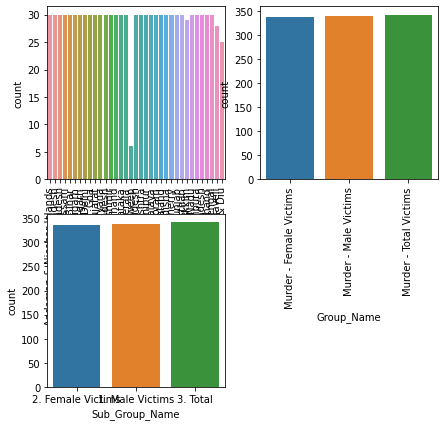

In [ ]:

plt.figure(figsize=[7,7])

plt.subplot(221)
sns.countplot(crimes.Area_Name)
plt.xticks(rotation=90)

plt.subplot(222)
sns.countplot(crimes.Group_Name)
plt.xticks(rotation=90)

plt.subplot(223)
sns.countplot(crimes.Sub_Group_Name)
plt.show()

In [ ]:
crimes.Group_Name.value_counts()

Murder - Total Victims     342
Murder - Male Victims      339
Murder - Female Victims    337
Name: Group_Name, dtype: int64

In [ ]:
crimes.Sub_Group_Name.value_counts()

3. Total             342
1. Male Victims      339
2. Female Victims    337
Name: Sub_Group_Name, dtype: int64

In [ ]:
crimes.drop('Sub_Group_Name',axis=1,inplace=True)

<Figure size 936x936 with 0 Axes>

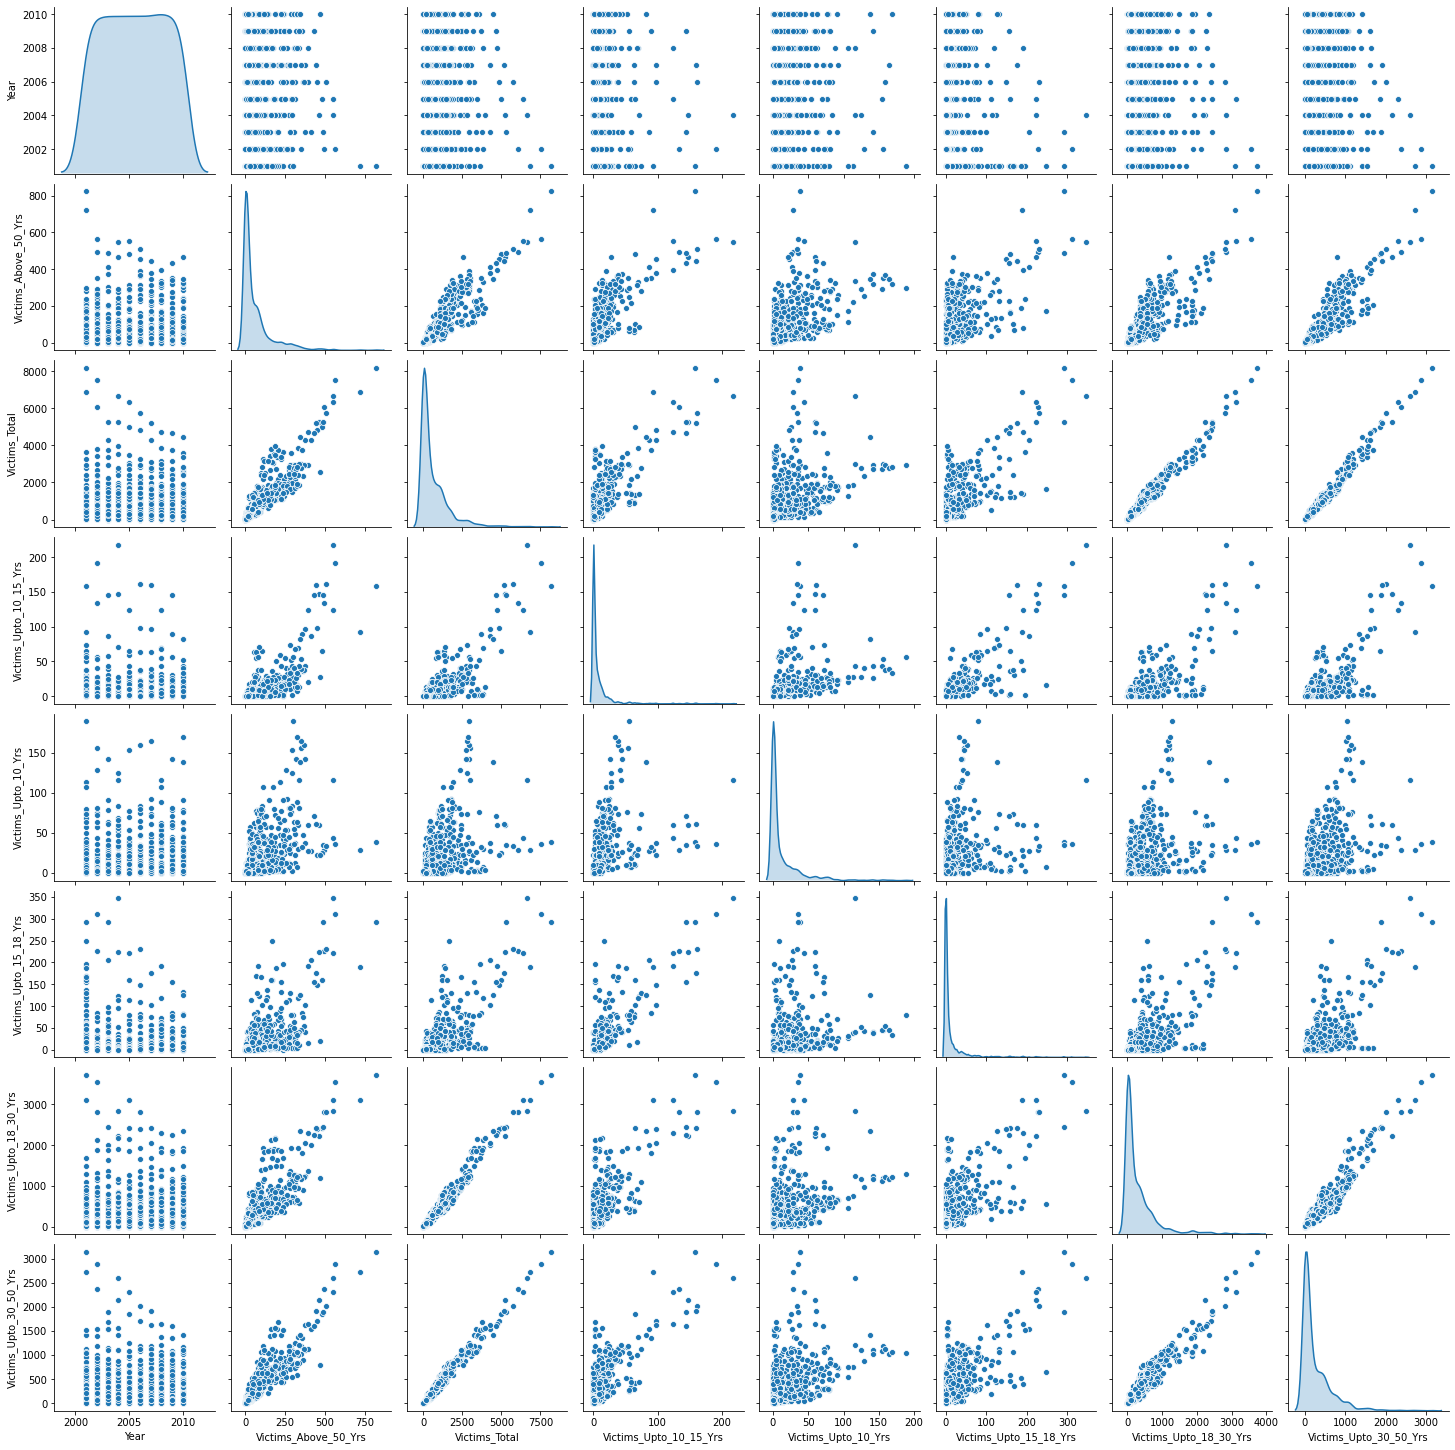

In [ ]:
plt.figure(figsize=[13,13])
sns.pairplot(crimes,diag_kind='kde')

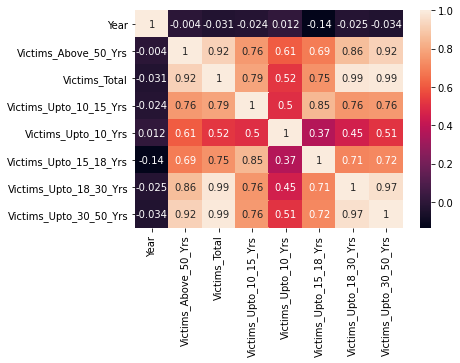

In [ ]:
sns.heatmap(crimes.corr(),annot=True)
plt.show()

In [ ]:
crimes.Group_Name.value_counts()

Murder - Total Victims     342
Murder - Male Victims      339
Murder - Female Victims    337
Name: Group_Name, dtype: int64

In [ ]:
crimes.Area_Name.value_counts()

Odisha                       30
Puducherry                   30
Andaman & Nicobar Islands    30
Bihar                        30
Jammu & Kashmir              30
Uttarakhand                  30
Chhattisgarh                 30
Tripura                      30
Chandigarh                   30
Arunachal Pradesh            30
Himachal Pradesh             30
Meghalaya                    30
Tamil Nadu                   30
Maharashtra                  30
Goa                          30
Karnataka                    30
Mizoram                      30
Manipur                      30
West Bengal                  30
Rajasthan                    30
Haryana                      30
Uttar Pradesh                30
Delhi                        30
Punjab                       30
Nagaland                     30
Gujarat                      30
Jharkhand                    30
Kerala                       30
Madhya Pradesh               30
Assam                        30
Andhra Pradesh               30
Sikkim  

In [ ]:
crimes.Year.value_counts()

2008    104
2009    102
2007    102
2006    102
2005    102
2004    102
2003    102
2010    101
2002    101
2001    100
Name: Year, dtype: int64

In [ ]:
crimes.Victims_Above_50_Yrs.value_counts()[0:5]

0.0     133
1.0      72
2.0      62
3.0      44
4.0      27
6.0      20
14.0     18
8.0      18
16.0     15
25.0     14
5.0      14
Name: Victims_Above_50_Yrs, dtype: int64

In [ ]:
dummy=pd.get_dummies(crimes)
dummy.head()

,Year,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs,Area_Name_Andaman & Nicobar Islands,Area_Name_Andhra Pradesh,Area_Name_Arunachal Pradesh,Area_Name_Assam,Area_Name_Bihar,Area_Name_Chandigarh,Area_Name_Chhattisgarh,Area_Name_Dadra & Nagar Haveli,Area_Name_Daman & Diu,Area_Name_Delhi,Area_Name_Goa,Area_Name_Gujarat,Area_Name_Haryana,Area_Name_Himachal Pradesh,Area_Name_Jammu & Kashmir,Area_Name_Jharkhand,Area_Name_Karnataka,Area_Name_Kerala,Area_Name_Lakshadweep,Area_Name_Madhya Pradesh,Area_Name_Maharashtra,Area_Name_Manipur,Area_Name_Meghalaya,Area_Name_Mizoram,Area_Name_Nagaland,Area_Name_Odisha,Area_Name_Puducherry,Area_Name_Punjab,Area_Name_Rajasthan,Area_Name_Sikkim,Area_Name_Tamil Nadu,Area_Name_Tripura,Area_Name_Uttar Pradesh,Area_Name_Uttarakhand,Area_Name_West Bengal,Group_Name_Murder - Female Victims,Group_Name_Murder - Male Victims,Group_Name_Murder - Total Victims
0,2001,0.0,6,0.0,0.0,0.0,4.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2001,67.0,607,15.0,38.0,43.0,269.0,175.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2001,2.0,16,0.0,0.0,0.0,10.0,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2001,11.0,128,8.0,4.0,23.0,45.0,37.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2001,12.0,366,0.0,0.0,40.0,191.0,123.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
x=dummy.drop('Victims_Upto_30_50_Yrs',axis=1)
y=dummy.Victims_Upto_30_50_Yrs

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression,PLSSVD
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X_std=StandardScaler().fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(X_std,y,test_size=0.30,random_state=123)

In [ ]:
dt_model = DecisionTreeRegressor(criterion = 'mse' )
dt_model.fit(xtrain, ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_predict=dt_model.predict(xtest)
r2=metrics.r2_score(ytest,y_predict)
r2

0.9723962394368634

In [ ]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00098328e+00 -3.96626589e-03 -3.08028051e-02 ...  1.60206566e-03
   1.24483426e-04 -1.72039298e-03]
 [-3.96626589e-03  1.00098328e+00  9.23192249e-01 ... -3.06043043e-01
   8.08917142e-02  2.24204440e-01]
 [-3.08028051e-02  9.23192249e-01  1.00098328e+00 ... -3.06142609e-01
   7.11131490e-02  2.34060802e-01]
 ...
 [ 1.60206566e-03 -3.06043043e-01 -3.06142609e-01 ...  1.00098328e+00
  -4.97545934e-01 -5.00850284e-01]
 [ 1.24483426e-04  8.08917142e-02  7.11131490e-02 ... -4.97545934e-01
   1.00098328e+00 -5.03073559e-01]
 [-1.72039298e-03  2.24204440e-01  2.34060802e-01 ... -5.00850284e-01
  -5.03073559e-01  1.00098328e+00]]


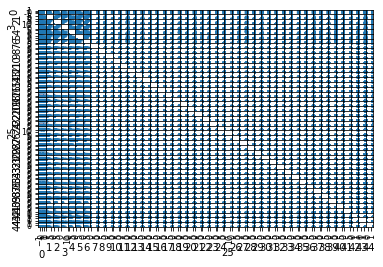

In [ ]:
X_std_df = pd.DataFrame(X_std)
axes = pd.plotting.scatter_matrix(X_std_df)
plt.tight_layout()

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [ ]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-1.78486527e-02 -5.19326847e-02  1.35800855e-01 ...  8.01842803e-16
  -4.42140896e-15  4.67720032e-15]
 [ 3.98416720e-01 -4.29980703e-02 -1.41126415e-01 ... -5.56068250e-16
   1.10778620e-15  2.75468707e-16]
 [ 4.11370965e-01  7.40426426e-02 -1.25254024e-01 ...  3.35582621e-15
  -5.64941632e-15 -8.44335771e-17]
 ...
 [-1.23141086e-01 -1.64987439e-01 -3.67209662e-03 ... -1.26702604e-16
  -2.08694613e-16  2.28185763e-17]
 [ 1.51240210e-02  4.01036283e-01  2.30029099e-02 ...  9.77763812e-17
   6.02021183e-16 -2.62104822e-16]
 [ 1.07597930e-01 -2.35776941e-01 -1.92939484e-02 ...  2.88290258e-16
  -2.49699520e-16  2.49287825e-16]]

 Eigen Values 
%s [ 5.47875387e+00  1.63196086e+00  2.50619703e-01  1.90554709e-01
  1.30257671e-01  7.17494430e-02  5.53170923e-02  2.68528217e-03
  1.52289905e+00  1.47538230e+00  1.23229651e+00  9.75847130e-01
  1.08152097e+00  1.05048998e+00  1.01286805e+00  1.03760573e+00
  1.02852228e+00  1.03011956e+00  1.03173728e+00 -2.20013949e-15
  

In [ ]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [ ]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 12.16304887  15.7860661   19.16696182  22.4423685   25.17811516
  27.57913422  29.91126326  32.21478876  34.50528605  36.79498466
  39.08468327  41.37438187  43.66408048  45.95377908  48.24347769
  50.53317629  52.8228749   55.1125735   57.40227211  59.69197071
  61.98166932  64.27136793  66.56106653  68.85076514  71.14046374
  73.43016235  75.71986095  78.00955956  80.29925816  82.58895677
  84.87865538  87.16835398  89.45805259  91.74495849  94.02831835
  96.27692522  98.44334419  98.99972978  99.42276872  99.71194587
  99.87123245  99.99403857 100.         100.         100.        ]


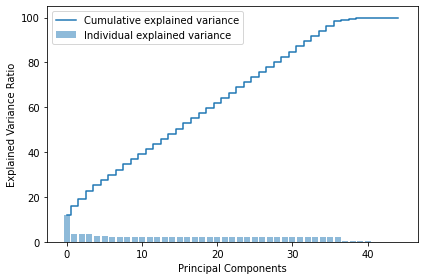

In [ ]:
plt.figure(figsize=(6 , 4))
plt.bar(range(45), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(45), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor()

In [ ]:
model1=rf.fit(xtrain,ytrain)
pred=model1.predict(xtest)

In [ ]:
r2=metrics.r2_score(ytest,pred)
r2

0.981178540657395